In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory where your dataset is stored
data_dir = '/content/drive/MyDrive/Smart India Hackathon/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images'

# Define the image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Use ImageDataGenerator for data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

train_generator = train_data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Number of classes
num_classes = len(train_generator.class_indices)


Found 1479 images belonging to 30 classes.
Found 356 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5  # Adjust the number of epochs as needed
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/5
47/47 [==============================] - 537s 11s/step - loss: 3.5283 - accuracy: 0.1116 - val_loss: 2.8506 - val_accuracy: 0.2107
Epoch 2/5
47/47 [==============================] - 168s 4s/step - loss: 2.5847 - accuracy: 0.2745 - val_loss: 2.4167 - val_accuracy: 0.3034
Epoch 3/5
47/47 [==============================] - 172s 4s/step - loss: 2.0961 - accuracy: 0.4151 - val_loss: 2.0344 - val_accuracy: 0.3904
Epoch 4/5
47/47 [==============================] - 179s 4s/step - loss: 1.6986 - accuracy: 0.5057 - val_loss: 1.9291 - val_accuracy: 0.4775
Epoch 5/5
47/47 [==============================] - 170s 4s/step - loss: 1.3923 - accuracy: 0.5740 - val_loss: 1.6579 - val_accuracy: 0.5506


In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)


12/12 [==============================] - 18s 1s/step - loss: 1.6267 - accuracy: 0.5843
Validation loss: 1.6267434358596802
Validation accuracy: 0.584269642829895


Epoch 1/5
47/47 [==============================] - 181s 4s/step - loss: 1.1036 - accuracy: 0.6613 - val_loss: 1.5233 - val_accuracy: 0.5927
Epoch 2/5
47/47 [==============================] - 175s 4s/step - loss: 1.0723 - accuracy: 0.6870 - val_loss: 1.4135 - val_accuracy: 0.6376
Epoch 3/5
47/47 [==============================] - 171s 4s/step - loss: 0.8862 - accuracy: 0.7350 - val_loss: 1.3007 - val_accuracy: 0.6489
Epoch 4/5
47/47 [==============================] - 168s 4s/step - loss: 0.7751 - accuracy: 0.7647 - val_loss: 1.4358 - val_accuracy: 0.6376
Epoch 5/5
47/47 [==============================] - 172s 4s/step - loss: 0.6757 - accuracy: 0.7978 - val_loss: 1.2514 - val_accuracy: 0.6966


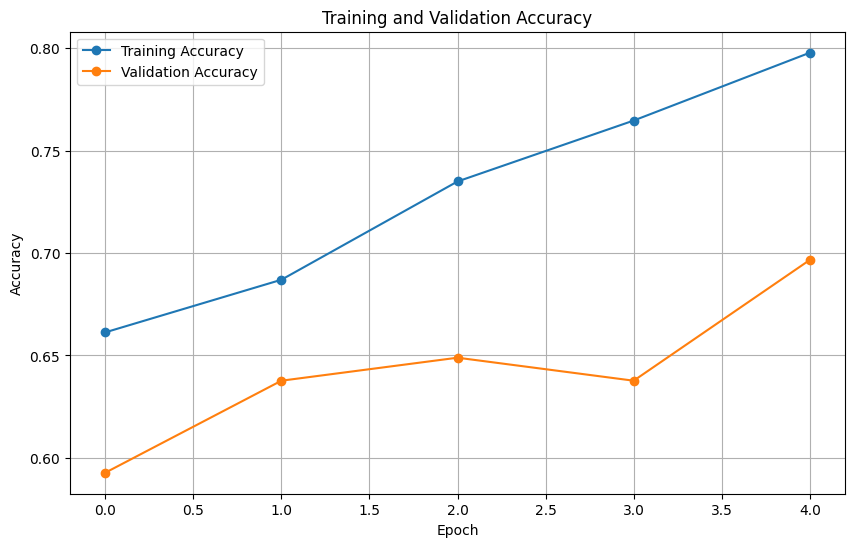

In [ ]:
import matplotlib.pyplot as plt

# Train the model and record training history
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Plot training accuracy and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random

data_dir = '/content/drive/MyDrive/Smart India Hackathon/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images'

# Function to display one image from each folder
def display_one_image_per_folder(data_dir):
    subfolders = [f.path for f in os.scandir(data_dir) if f.is_dir()]

    # Display one image from each folder
    for folder in subfolders:
        plant_name = os.path.basename(folder)
        image_files = [f.path for f in os.scandir(folder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))]

        if image_files:
            random_image = random.choice(image_files)
            img = plt.imread(random_image)

            plt.figure()
            plt.imshow(img)
            plt.title(f'Plant: {plant_name}')
            plt.axis('off')
            plt.show()

# Call the function to display one image from each folder
display_one_image_per_folder(data_dir)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Save the model
model.save('medicinal_plant_model.keras')